# Importing  Relevant Libraries 

In [23]:
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_csv = pd.read_csv('user_data.csv')
data_csv = data_csv.rename({'First Name':'firstName','Second Name':'lastName'},axis=1)

In [4]:
data_csv.head()

,firstName,lastName,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon"
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan


In [5]:
data_json = pd.read_json('user_data.json')


In [6]:
data_json.head()

,firstName,lastName,age,iban,credit_card_number,credit_card_security_code,credit_card_start_date,credit_card_end_date,address_main,address_city,address_postcode,debt
0,Janet,Whittaker,79,GB06TIPX06791401324359,213175641545275,596,12/17,08/20,Studio 6 Robin court,Christopherland,N49 2LB,NaN
1,Kieran,Heath,83,GB28VQOG22478273510511,4153200250709345,248,11/13,08/21,13 Hale light,East Mandy,BA1 4GB,NaN
2,Jane,Turner,29,GB07EALL99866589295356,6011192438703554,610,03/18,04/18,0 Cooper plains,Sharonville,N56 0PY,"{'amount': '4440.19', 'time_period_years': 0}"
3,Arthur,Mistry,27,GB35LSGC87398305883119,502098808533,948,12/18,06/27,312 Parsons junctions,Williamstown,BN5M 3UU,NaN
4,Julian,King,20,GB94ENYC03030578781434,213160758811140,851,06/21,01/25,396 Leon tunnel,South Bethborough,N9J 1TD,NaN


In [7]:
data_txt = pd.read_csv('user_data.txt')

In [8]:
data_txt

,"Debra Wood phoned up at the weekend. They mentioned that they might have gotten their security code incorrect on their billing information, numbers in the wrong order or something. They think that it's 592"
0,Congratulations on the promotion Howard! Keep ...
1,Happy Birthday Ms Molly Dobson! We can't belie...
2,"INTERNAL MEMO (CONFIDENTIAL): Harrison, we've ..."


# Converting the xml file to a DataFrame on Pandas

## this requires that we import the libirary etree

In [9]:
data_xml = ET.parse('user_data.xml')
xroot = data_xml.getroot()
df_cols =['firstName','lastName','company','pension','salary','marital_status','dependants','retired','sex','age']
rows = []  #empty list is created to hold deails of various columns as defined above
for node in xroot:
    employer = node.attrib.get('company')
    pension = node.attrib.get('pension')
    dependants = node.attrib.get('dependants')
    salary = node.attrib.get('salary')
    marital_status = node.attrib.get('marital_status')
    gender = node.attrib.get('sex')
    age = node.attrib.get('age')
    surname = node.attrib.get('lastName')
    firstname = node.attrib.get('firstName')
    
    rows.append({'firstName':firstname,'lastName':surname,'company':employer,'pension':pension,'salary':salary,'marital_status':marital_status,'dependants':dependants,'sex':gender,'age':age})
data_xml = pd.DataFrame(rows, columns = df_cols)
data_xml.head()

,firstName,lastName,company,pension,salary,marital_status,dependants,retired,sex,age
0,Hannah,Jones,Ward and Sons,0,20603,married or civil partner,2,NaN,Female,21
1,Tracy,Rowley,"Fuller, King and Robinson",0,39509,single,1,NaN,Female,50
2,Shane,Thompson,N/A,13409,53134,single,2,NaN,Male,87
3,Michael,Anderson,N/A,39479,58524,married or civil partner,2,NaN,Male,85
4,Clifford,Mason,"Wood, Clarke and Wood",0,32510,widowed,1,NaN,Male,64


# Join the various DataFrames from

In [10]:
data1 = pd.merge(data_csv,data_json, how ='inner',left_on=['firstName','lastName'],right_on=['firstName','lastName'])

#this combines merges the two dataframes data_csv and data_json


In [11]:
data = pd.merge(data1,data_xml, how='inner', left_on=['firstName','lastName'],right_on=['firstName','lastName'])

data.tail(10)
#the we repeat the process to merge the resulting dataframe data1 with data_xml

,firstName,lastName,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type,age_x,iban,...,address_postcode,debt,company,pension,salary,marital_status,dependants,retired,sex,age_y
1050,Patrick,Scott,78,Male,Honda,Grand Cherokee,2003,"Hatchback, Convertible",78,GB69LKGO92105963751533,...,KY3E 3ZJ,NaN,N/A,34057,45297,married or civil partner,3,NaN,Male,78
1051,Billy,Singh,71,Male,Audi,Ram Van 3500,2010,"Sedan, Wagon",71,GB83CSJL23012390968155,...,HU54 3BW,5340.17,Thomas-Richards,0,74800,married or civil partner,3,NaN,Male,71
1052,Kelly,Carr,67,Female,Saturn,Metris Cargo,1994,Sedan,67,GB20DDFP37895910516097,...,L6 1NG,2091.74,Bennett Group,0,53990,married or civil partner,2,NaN,Female,67
1053,Hilary,Howard,28,Female,Hyundai,Cavalier,2015,SUV,28,GB45ATPS09542642371826,...,L65 4WE,NaN,Hussain-Adams,0,84396,single,2,NaN,Female,28
1054,Dylan,Hargreaves,71,Male,GMC,Compass,2007,SUV,71,GB20PBQX55149190165638,...,B9S 5LN,NaN,N/A,31986,66078,single,2,NaN,Male,71
1055,Jay,Murray,60,Male,MINI,Outback,1997,Pickup,60,GB71MISY27787323725360,...,W11 7TG,NaN,Woodward Ltd,0,46445,divorced,1,NaN,Male,60
1056,Leslie,Clarke,42,Male,Toyota,Sienna,2014,SUV,42,GB02BIBF38447263634814,...,W08 5JW,5915.44,Harper-Ford,0,40021,married or civil partner,2,NaN,Male,42
1057,Natasha,Reid,86,Female,Chevrolet,NX,2015,"Convertible, Coupe",86,GB88JZXV39357569891425,...,N09 2NR,NaN,N/A,18095,62874,widowed,2,NaN,Female,86
1058,Samantha,Francis,43,Female,Nissan,Silverado 1500 Extended Cab,2010,Sedan,43,GB86GUJZ40891176368758,...,M04 7UB,NaN,"Gregory, Evans and Morris",0,72168,single,1,NaN,Female,43
1059,Brett,Porter,38,Male,Toyota,M-Class,2010,Pickup,38,GB95GQMA24589145676488,...,TR43 4BN,NaN,"North, Thomas and Fraser",0,52522,married or civil partner,1,NaN,Male,38


Index(['firstName', 'lastName', 'Age (Years)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type', 'age_x', 'iban',
       'credit_card_number', 'credit_card_security_code',
       'credit_card_start_date', 'credit_card_end_date', 'address_main',
       'address_city', 'address_postcode', 'debt', 'company', 'pension',
       'salary', 'marital_status', 'dependants', 'retired', 'sex', 'age_y'],
      dtype='object')

In [15]:
data_unclean = data.filter(['firstName','lastName','Age (Years)','Sex','address_main','pension','salary','marital_status','dependants','company'],axis=1)
data_unclean

,firstName,lastName,Age (Years),Sex,address_main,pension,salary,marital_status,dependants,company
0,Oliver,Brady,68,Male,Studio 15 Donna lights,0,62743,single,2,Myers-Smith
1,Denis,Jackson,35,Male,Studio 38r Gordon wells,0,82669,married or civil partner,3,Smith-Stewart
2,Joshua,Williams,26,Male,173 Jones meadow,0,27951,single,,Knowles-Willis
3,Malcolm,Johnson,37,Male,Flat 92 Dale courts,0,37670,married or civil partner,5,Baker Ltd
4,Ashley,Bates,57,Male,0 Josephine mountain,0,19783,single,1,Read-Smith
...,...,...,...,...,...,...,...,...,...,...
1055,Jay,Murray,60,Male,539 Clive fords,0,46445,divorced,1,Woodward Ltd
1056,Leslie,Clarke,42,Male,Studio 02 Atkinson ridges,0,40021,married or civil partner,2,Harper-Ford
1057,Natasha,Reid,86,Female,033 Brown parkway,18095,62874,widowed,2,N/A
1058,Samantha,Francis,43,Female,53 Martin camp,0,72168,single,1,"Gregory, Evans and Morris"


# Checking if there are null values in the data set

In [19]:
data_unclean.isnull().any()

firstName         False
lastName          False
Age (Years)       False
Sex               False
address_main      False
pension           False
salary            False
marital_status    False
dependants        False
company           False
dtype: bool

In [21]:
data_clean = data_unclean
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   firstName       1060 non-null   object
 1   lastName        1060 non-null   object
 2   Age (Years)     1060 non-null   int64 
 3   Sex             1060 non-null   object
 4   address_main    1060 non-null   object
 5   pension         1060 non-null   object
 6   salary          1060 non-null   object
 7   marital_status  1060 non-null   object
 8   dependants      1060 non-null   object
 9   company         1060 non-null   object
dtypes: int64(1), object(9)
memory usage: 91.1+ KB


# Visualising Data

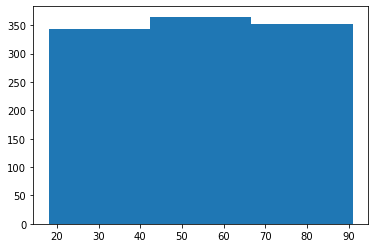

In [28]:
plt.hist(data_clean['Age (Years)'],bins=3)
plt.show()